# Histograms
---
Check out the video for full details, but here is also a great write-up: http://www.cambridgeincolour.com/tutorials/histograms1.htm

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image Histograms with OpenCV
---
Recall that Matplotlib expects the images in a different RGB ordering vs BGR in OpenCV, so if we use OpenCV to calculate anything channel oriented, we'll want to make sure we keep the original RGB ordering, however if we ever want to display the image, then we'll need to convert to the RGB ordering that matplotlib wants.

In [2]:
dark_horse = cv2.imread('../DATA/horse.jpg') # ORIGINAL BGR
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB) # Converted to RGB FOR SHOW

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

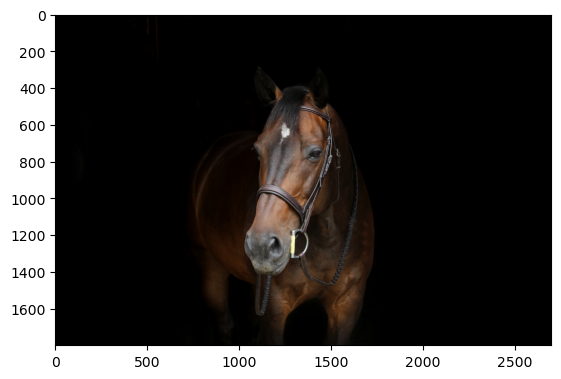

In [3]:
plt.imshow(show_horse);

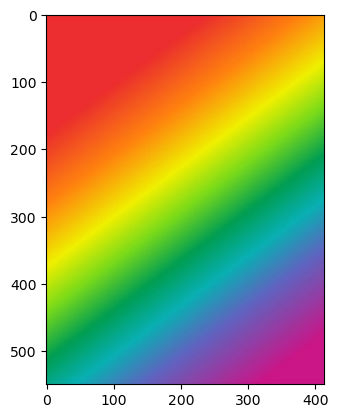

In [4]:
plt.imshow(show_rainbow);

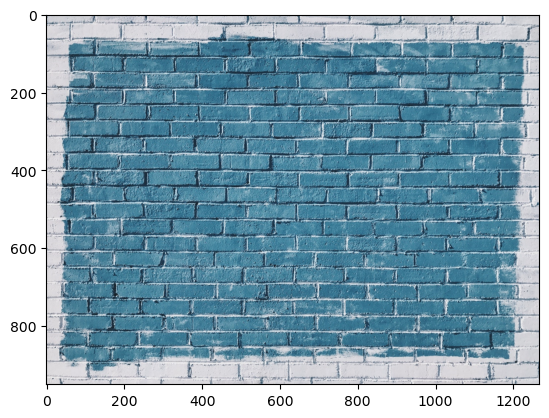

In [5]:
plt.imshow(show_bricks);

### OpenCV Histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

In [6]:
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist_values.shape

(256, 1)

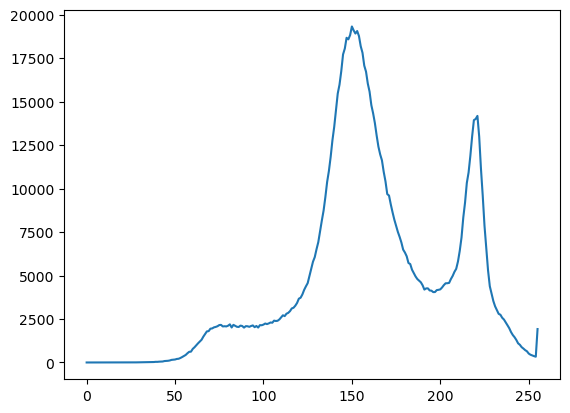

In [7]:
plt.plot(hist_values);

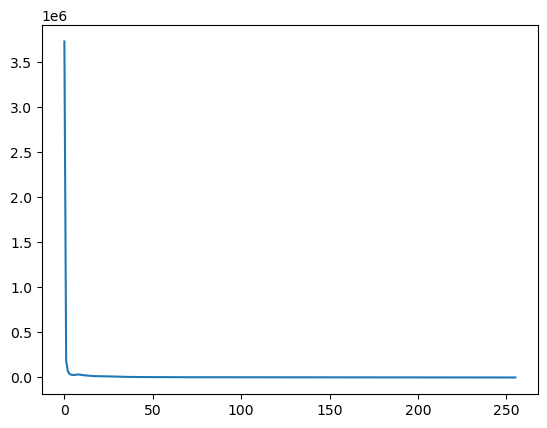

In [8]:
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values);

In [9]:
img = blue_bricks

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE BRICKS')

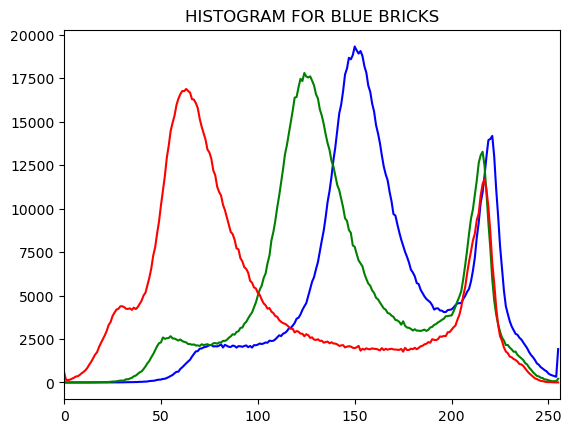

In [10]:
color = ('b', 'g', 'r')

for i,col in enumerate(color):
    
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
    
plt.title('HISTOGRAM FOR BLUE BRICKS');

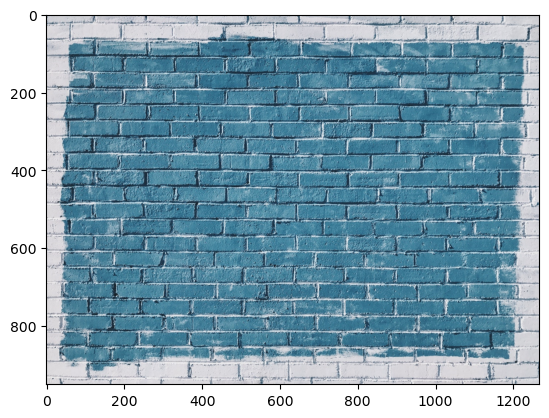

In [11]:
plt.imshow(show_bricks);

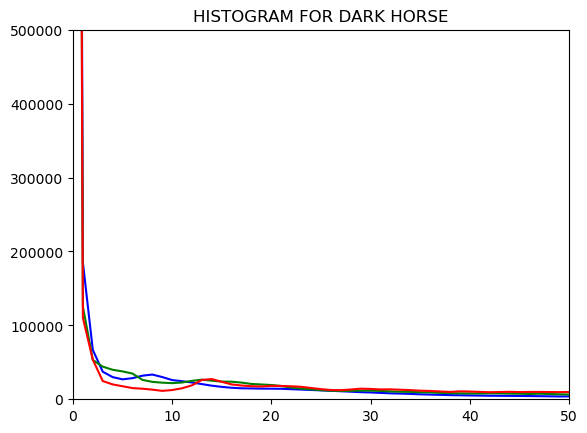

In [14]:
img = dark_horse

color = ('b', 'g', 'r')

for i,col in enumerate(color):
    
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,50])
    plt.ylim([0,500000])
    
plt.title('HISTOGRAM FOR DARK HORSE');

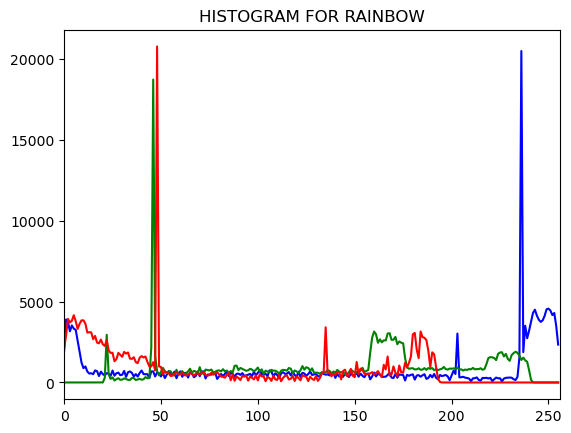

In [16]:
img = show_rainbow

color = ('b', 'g', 'r')

for i,col in enumerate(color):
    
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
    
plt.title('HISTOGRAM FOR RAINBOW');

### Masking

We can mask only certain parts of the image.

In [18]:
img = rainbow

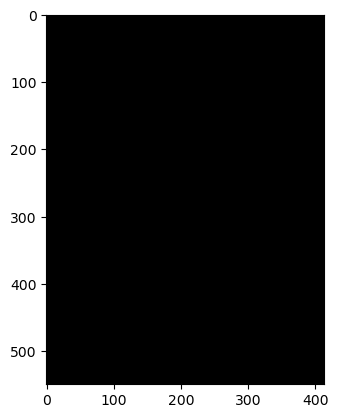

In [19]:
mask = np.zeros(img.shape[:2], np.uint8)
plt.imshow(mask, cmap="gray");

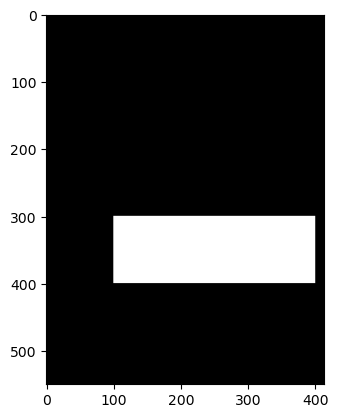

In [21]:
mask[300:400,100:400] = 255
plt.imshow(mask, cmap='gray');

In [24]:
masked_img = cv2.bitwise_and(img, img, mask=mask)
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)

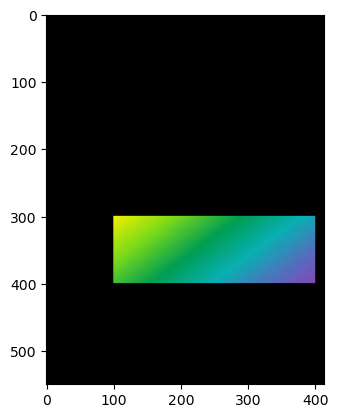

In [25]:
plt.imshow(show_masked_img);

In [27]:
# BGR
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2], mask=mask, histSize=[256], ranges=[0,256])
hist_values_red = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0,256])

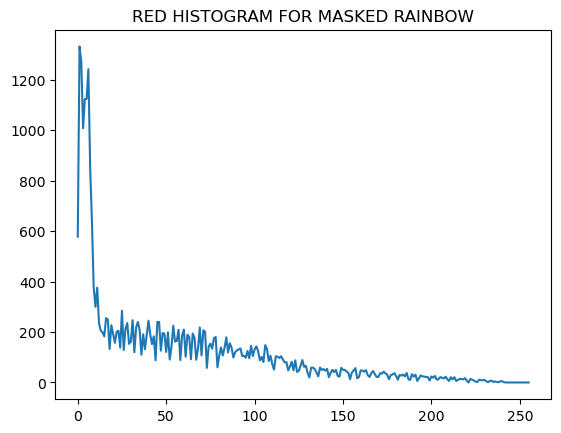

In [28]:
plt.plot(hist_mask_values_red)
plt.title('RED HISTOGRAM FOR MASKED RAINBOW');

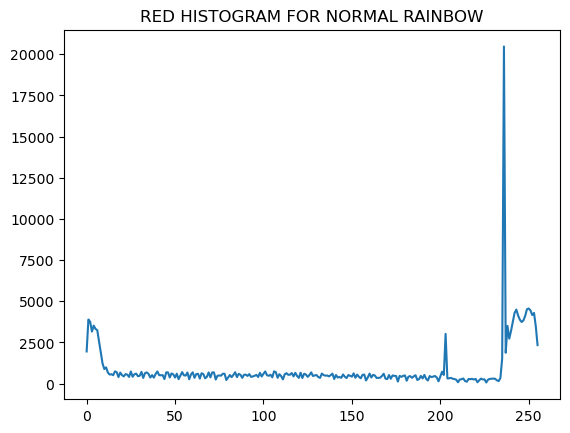

In [29]:
plt.plot(hist_values_red)
plt.title('RED HISTOGRAM FOR NORMAL RAINBOW');

# Histogram Eqaulization
---
Make sure to watch the video and also read: https://en.wikipedia.org/wiki/Histogram_equalization

In [32]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

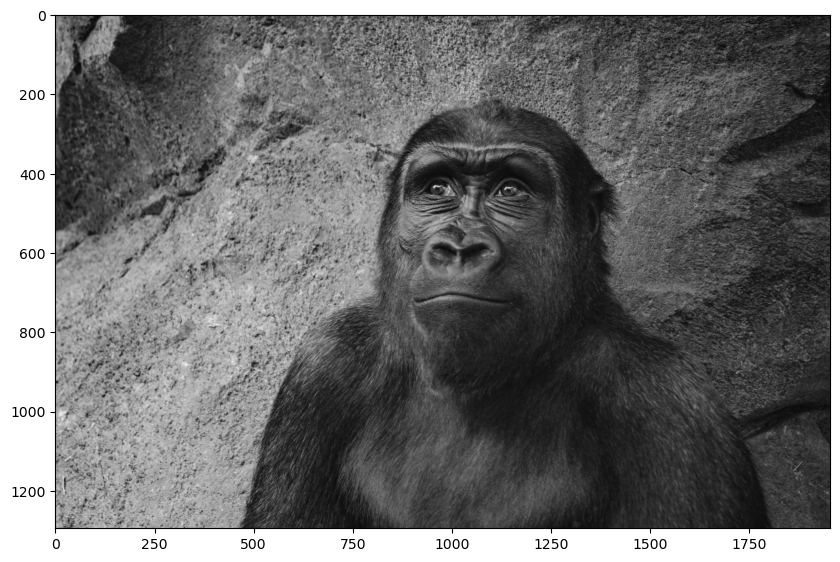

In [33]:
gorilla = cv2.imread('../DATA/gorilla.jpg', 0)
display(gorilla)

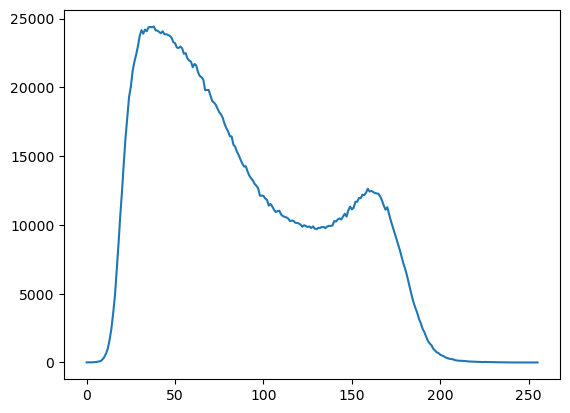

In [35]:
hist_values = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values);

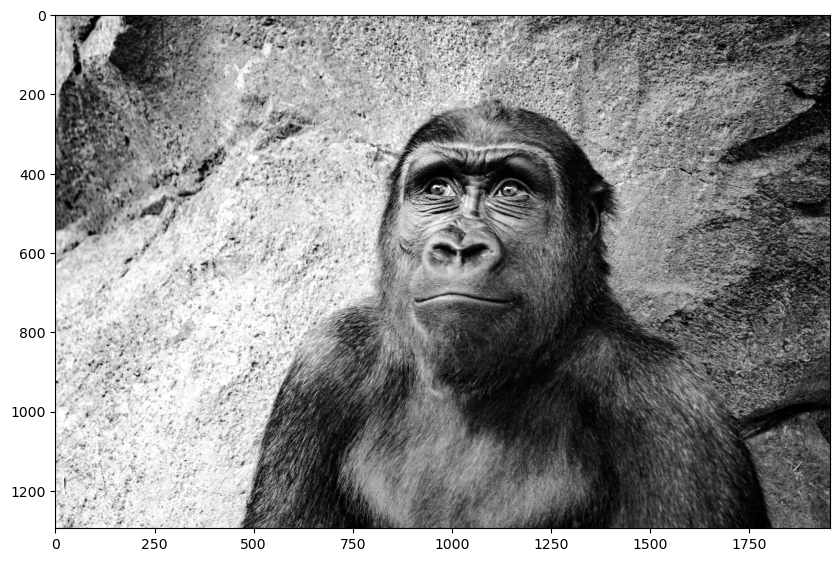

In [36]:
eq_gorilla = cv2.equalizeHist(gorilla)
display(eq_gorilla)

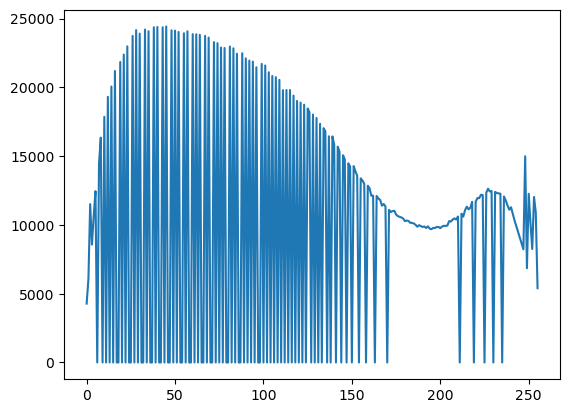

In [37]:
hist_values = cv2.calcHist([eq_gorilla], [0], None, [256], [0,256])
plt.plot(hist_values);

## Color Images

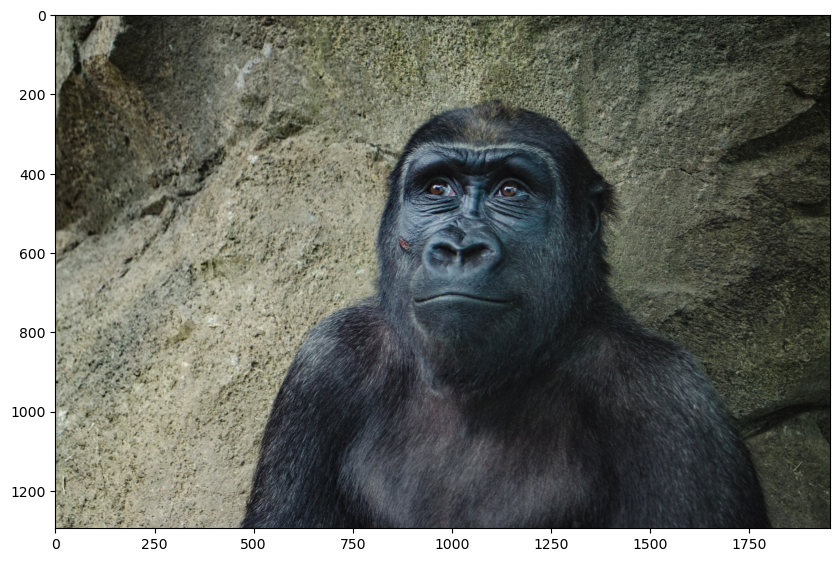

In [38]:
color_gorilla = cv2.imread('../DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

display(show_gorilla)

In [39]:
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

In [40]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

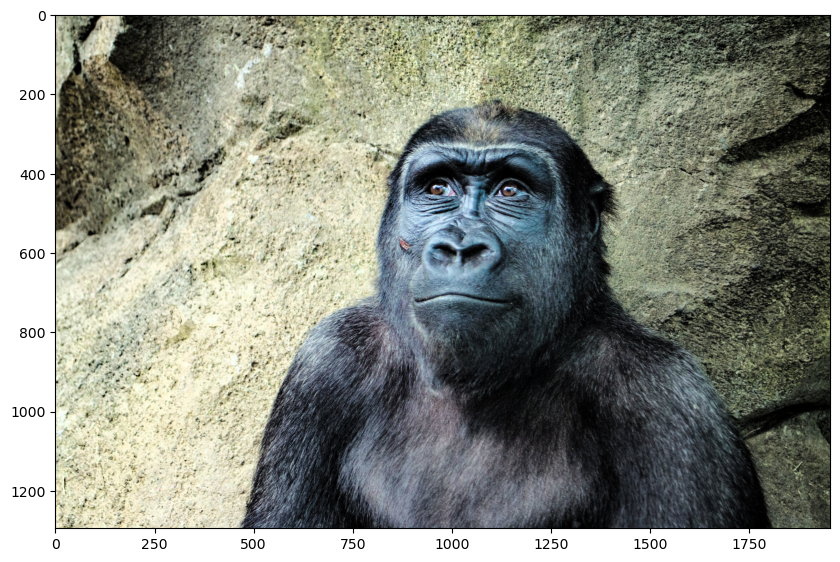

In [42]:
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)